In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


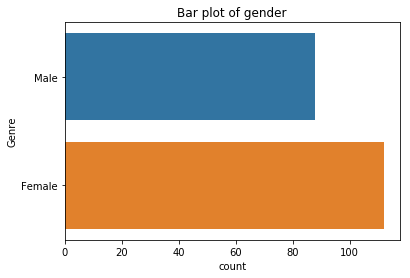

In [5]:
plt.title("Bar plot of gender")
sns.countplot(y="Genre",data=df)

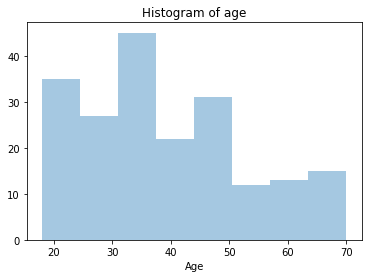

In [6]:
plt.title("Histogram of age")
sns.distplot( a=df["Age"], hist=True, kde=False)

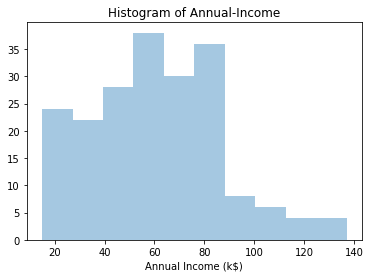

In [7]:
plt.title("Histogram of Annual-Income")
sns.distplot( a=df["Annual Income (k$)"], hist=True,kde=False)

In [8]:
X=df.iloc[:,[3,4]].values

In [9]:
from sklearn.cluster import KMeans

## wcss ==within cluster sum of squares
wcss=[]
for i in range(1,11):
    ## initializing the algorithm with k-means++ to avoid random initialization trap
    kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,random_state=0)
    kmeans.fit(X)
    ## kmeans.inertia_ gives the value of wcss for particual cluster
    wcss.append(kmeans.inertia_)

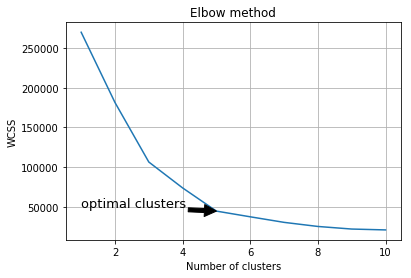

In [10]:
## elbow method to calculate the optimal value of clusters
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow method")
plt.plot(range(1,11),wcss)
plt.annotate('optimal clusters', xy=(5,wcss[4]), xytext=(1,50000),size=13,arrowprops=dict(facecolor='black'))
plt.grid()

In [11]:
## applying k-means by selecting the clusters as "5"
kmeans=KMeans(n_clusters=5,init="k-means++",max_iter=300,random_state=0)

## predicting to which cluster each observation belong to..
y_kmeans=kmeans.fit_predict(X)

In [12]:
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1, 4, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2])

In [13]:
type(y_kmeans)

numpy.ndarray

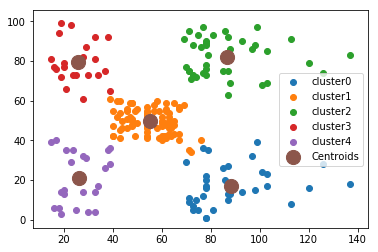

In [14]:
## scatter plot of each cluter
for i in range(0,5):
    plt.scatter(X[y_kmeans==i,0],X[y_kmeans==i,1],label="cluster"+str(i))

## displaying the centriods of each cluster
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],label="Centroids",s=200)
plt.legend()

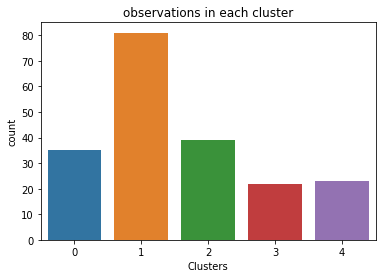

In [15]:
plt.xlabel("Clusters")
plt.title("observations in each cluster")
sns.countplot(x=y_kmeans)


In [16]:
## adding the cluster column to the dataframe
df["Cluster"]=y_kmeans

In [17]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [18]:
## grouping by clusters and calculating the mean of each cluster for different columns
df.groupby("Cluster")["Age","Annual Income (k$)","Spending Score (1-100)"].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,41.114286,88.200000,17.114286
1,42.716049,55.296296,49.518519
2,32.692308,86.538462,82.128205
3,25.272727,25.727273,79.363636
4,45.217391,26.304348,20.913043
